In [1]:
import sys
sys.path.append('/workspaces/bha2/src')

In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import nibabel as nib
from nilearn import plotting
from connectivity_functions import *
from tree_functions import *
from ni_functions import *
from io_functions import load_data, load_receptor_data
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, leaves_list

In [6]:
project_path = "/workspaces/bha2"
conn_size = 2165
optimal_parcellation = nib.load(os.path.join(project_path, "data", "results", "n" + str(conn_size), "optimal_partition.nii.gz")).get_fdata()
module_sizes = nib.load(os.path.join(project_path, "data", "results", "n" + str(conn_size), "module_sizes.nii.gz")).get_fdata()
module_idx = np.setdiff1d(np.unique(optimal_parcellation), [0]).astype(int)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

<AxesSubplot:>

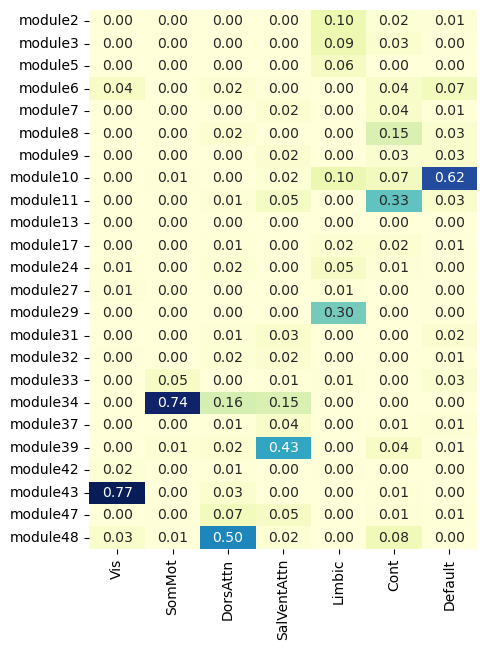

In [28]:
plt.rcParams['figure.figsize'] = (5, 7)

rsn = nib.load(os.path.join(project_path, "brain_templates", "atlases", "Yeo7_networks.nii.gz"))
rsn_labels = np.loadtxt(os.path.join(project_path, "brain_templates", "atlases", "Yeo7_networks.txt"), dtype=str)


RSN_table = pd.DataFrame(columns=rsn_labels, index=np.array(["module"+str(i) for i in module_idx]), dtype=float)

for idx in module_idx:
    module_vol = optimal_parcellation == idx
    m_size = np.setdiff1d(np.unique(module_sizes[module_vol]), [0])
    rsn_vol = rsn.get_fdata()
    if m_size > 10:
        rsn_count = np.zeros((int(rsn_vol.max())))
        for i in range(1, int(rsn_vol.max()) + 1):
            rsn_mask = np.where(rsn_vol == i, 1, 0)
            # dice index
            # rsn_count[i - 1] = 2*(rsn_mask*module_vol).sum() / (module_vol.sum()+rsn_mask.sum())
            # single overlap
            rsn_count[i - 1] = (rsn_mask*module_vol).sum() / (rsn_mask.sum())
        RSN_table.loc["module"+str(idx+1)] = rsn_count
RSN_table.dropna(axis=0, how='all', inplace=True)
sns.heatmap(RSN_table, cmap="YlGnBu", cbar=False, fmt='.2f', annot=True)

<AxesSubplot:>

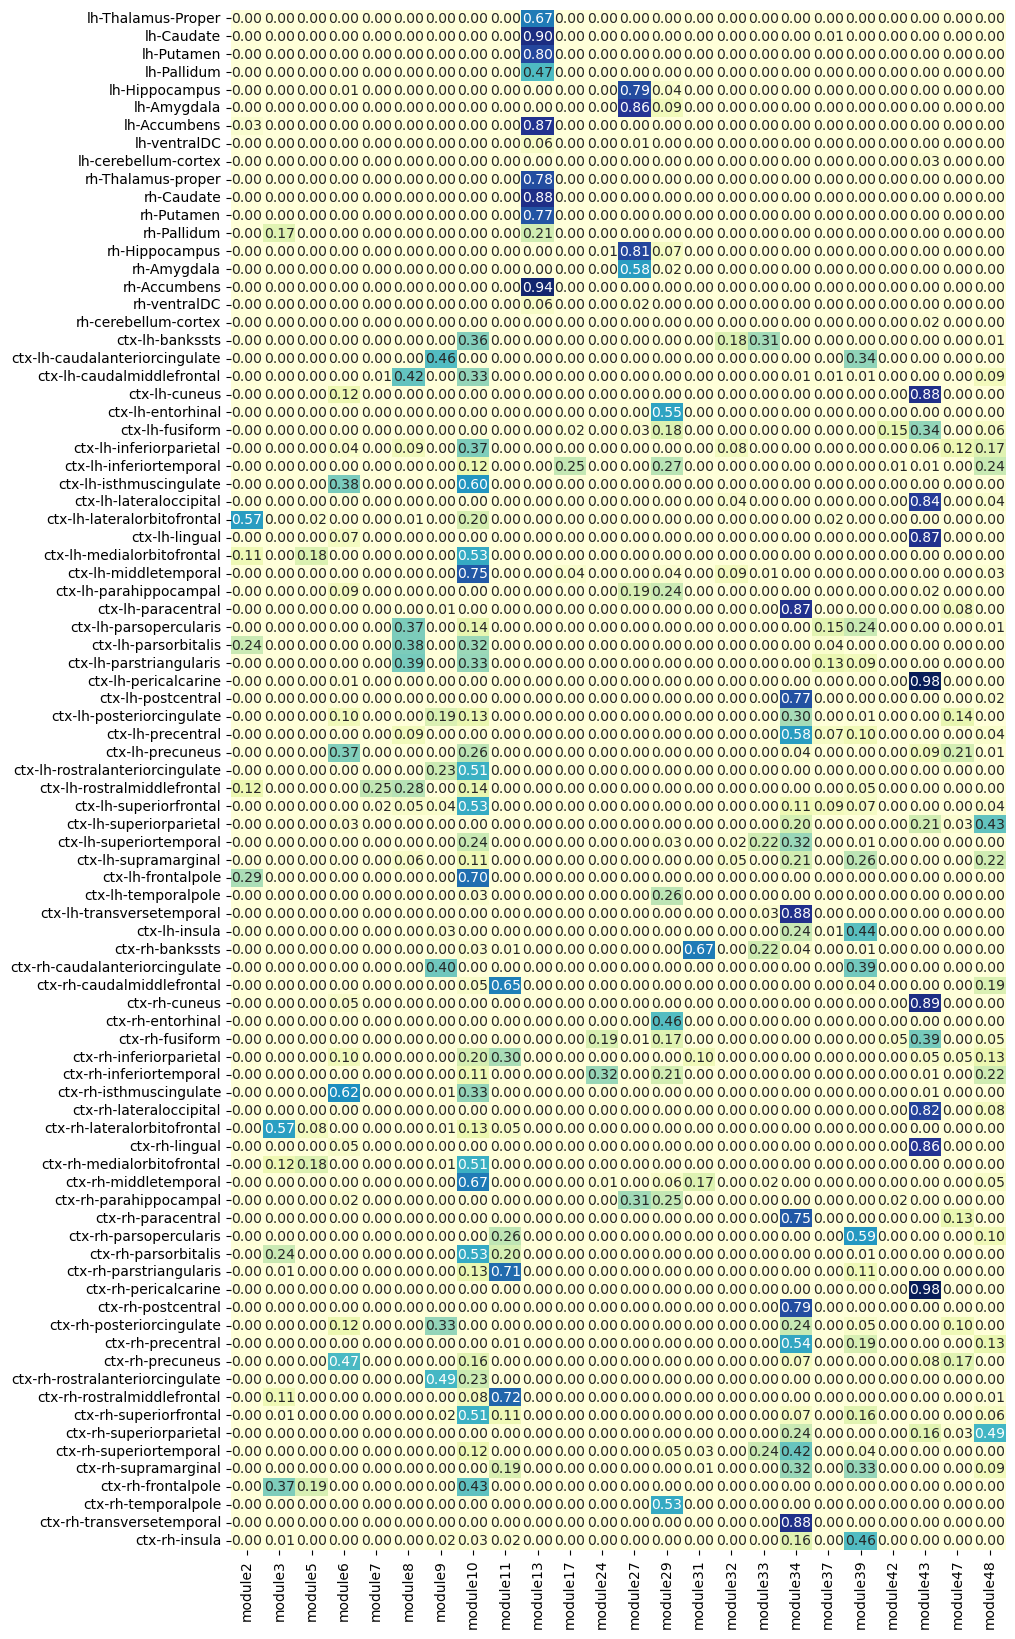

In [23]:
plt.rcParams['figure.figsize'] = (10, 20)

desikan = nib.load(os.path.join(project_path, "brain_templates", "atlases", "Desikan-killiany.nii.gz"))
desikan_labels = np.loadtxt(os.path.join(project_path, "brain_templates", "atlases", "Desikan-killiany.txt"), dtype=str)


desikan_table = pd.DataFrame(columns=desikan_labels, index=np.array(["module"+str(i) for i in module_idx]), dtype=float)

for idx in module_idx:
    module_vol = optimal_parcellation == idx
    m_size = np.setdiff1d(np.unique(module_sizes[module_vol]), [0])
    desikan_vol = desikan.get_fdata()
    if m_size > 10:
        desikan_count = np.zeros((int(desikan_vol.max())))
        for i in range(1, int(desikan_vol.max()) + 1):
            desikan_mask = np.where(desikan_vol == i, 1, 0)
            desikan_count[i - 1] = (desikan_mask*module_vol).sum() / (desikan_mask.sum())
        desikan_table.loc["module"+str(idx+1)] = desikan_count
desikan_table.dropna(axis=0, how='all', inplace=True)
sns.heatmap(pd.DataFrame.transpose(desikan_table), cmap="YlGnBu", cbar=False, fmt='.2f', annot=True)

<AxesSubplot:>

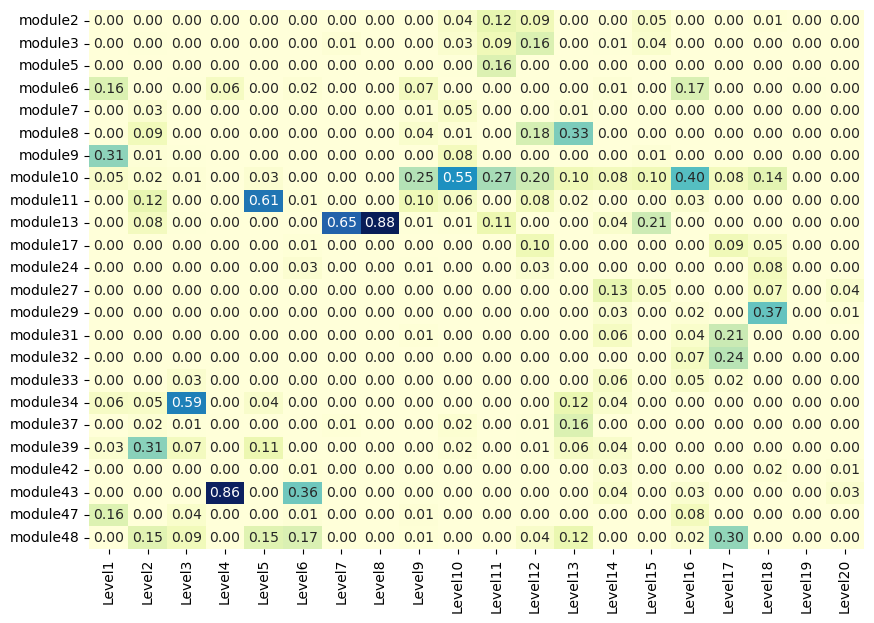

In [29]:
plt.rcParams['figure.figsize'] = (10, 7)

bha1 = nib.load(os.path.join(project_path, "brain_templates", "atlases", "BHA1_level20.nii.gz"))
bha1_labels = np.loadtxt(os.path.join(project_path, "brain_templates", "atlases", "BHA1_level20.txt"), dtype=str)


bha1_table = pd.DataFrame(columns=bha1_labels, index=np.array(["module"+str(i) for i in module_idx]), dtype=float)

for idx in module_idx:
    module_vol = optimal_parcellation == idx
    m_size = np.setdiff1d(np.unique(module_sizes[module_vol]), [0])
    bha1_vol = bha1.get_fdata()
    if m_size > 10:
        bha1_count = np.zeros((int(bha1_vol.max())))
        for i in range(1, int(bha1_vol.max()) + 1):
            bha1_mask = np.where(bha1_vol == i, 1, 0)
            bha1_count[i - 1] = (bha1_mask*module_vol).sum() / (bha1_mask.sum())
        bha1_table.loc["module"+str(idx+1)] = bha1_count
bha1_table.dropna(axis=0, how='all', inplace=True)
sns.heatmap(bha1_table, cmap="YlGnBu", cbar=False, fmt='.2f', annot=True)